In this notebook, we will try to predict a quality of a wine using its physiochemical attributes.

I will investigate the wine quality data which is available at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. More information can be found here:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Let us start with reading our files and checking the features:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
notebook_path = os.path.abspath("Machine_Learning_Project-Wine_Data.ipynb")
folder = os.path.join(os.path.dirname(notebook_path), "./OneDrive/Desktop/wine_data/winequality-white.csv")
white_wine = pd.read_csv(folder,delimiter=";")

white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We see from the describe (summary() equivalent of R function), with 11 independent and 1 dependent variable. There are no missing values in our dataset. The feature "quality" is the value we want to predict using rest of the features. We see that quality takes values between 3 and 9.

In [2]:
white_wine.isnull().sum() ## no missing values


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
white_wine.quality.unique() # We see that all the values are integers between 3 and 9

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

<AxesSubplot: >

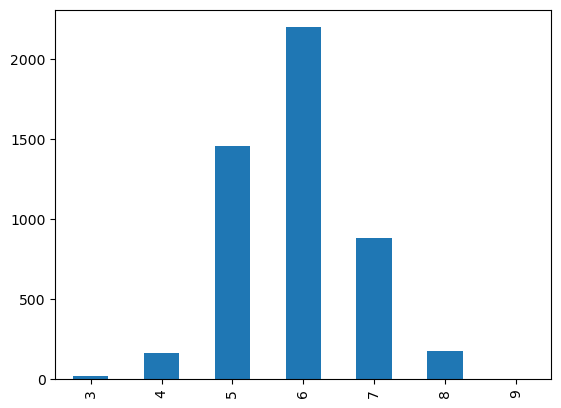

In [4]:
white_wine.quality.astype('string').value_counts().sort_index().plot(kind='bar')

We note that we have a nice almost normally distributed looking quality values with majority of the quality values having 6. Next, we determine if all the features are required or can we remove some of them:

In [5]:
pd.DataFrame.corr(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In our correlation matrix, if the absolute values of two features are close to 1 it means that those two features are highly correlated. For example, density seems to be affected by the residual sugar greatly. We can see this graph in action to understand it more visually:

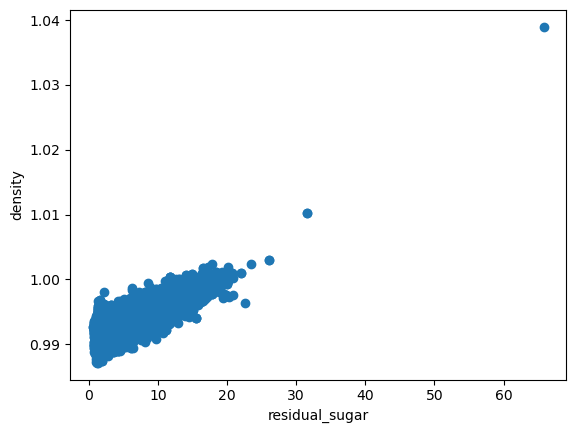

In [6]:
plt.xlabel('residual_sugar'); plt.ylabel('density')
plt.scatter(white_wine["residual sugar"],white_wine["density"])

We can observe one suspicious looking sample, other than that seems like increase in residual sugar results in increase in density most of the time. We can draw all these graphs to visually check the correlation as well. 

Maybe it would be smart to remove the outliers before starting our training process. We will create a new dataset with removed outliers. Note that, I will split the dataset after removing the outliers, because our belief is that these outliers are wrong recorded datapoints. 

We can remove the data points that lays outside a selected interval. We can use quantiles for tis purposes. Let's say that we will remove data points if values of a given feature is outside the quantile 2 to 98.


In [7]:
#idx = np.all(stats.zscore(num_train) < 3, axis=1)

Q1 = white_wine.quantile(0.02); Q2 = white_wine.quantile(0.98)
IQR = Q2 - Q1
idx = ~((white_wine <= (Q1 - 1.5*IQR)) | (white_wine > (Q2 + 1.5*IQR))).any(axis=1)
white_wine = white_wine[idx]

In [8]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000
mean,6.854498,0.277937,0.333915,6.379278,0.045562,35.260478,138.258945,0.994017,3.188227,0.489681,10.514594,5.879370
std,0.844040,0.100096,0.119527,5.001413,0.020576,16.609072,42.273817,0.002921,0.150974,0.114094,1.230703,0.884637
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.230000,31.600000,0.255000,146.500000,366.500000,1.010300,3.820000,1.080000,14.200000,9.000000


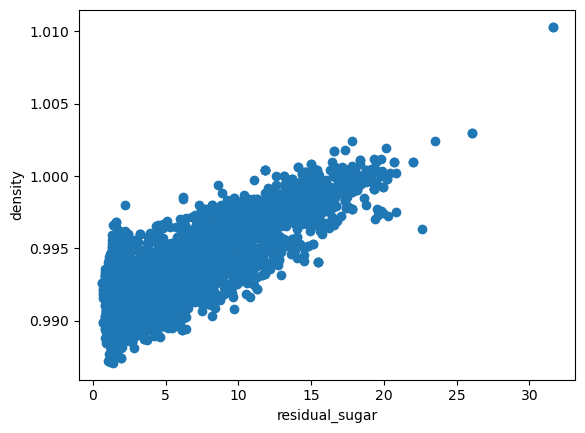

In [9]:
plt.xlabel('residual_sugar'); plt.ylabel('density')
plt.scatter(white_wine["residual sugar"],white_wine["density"])

We have ony removed 7 instances, and our distribution seems to make much more sense in this graph. Next, we split and then scale our data. We also know that our data labels are imbalanced, so we can oversample from the underrepresented classes.

In [10]:
white_wine.quality.value_counts()

6    2196
5    1454
7     880
8     175
4     162
3      19
9       5
Name: quality, dtype: int64

We still have a big problem with labels. Among thousand of data, only 5 has the value "9". Consider splitting this data to training and test. Additionally, for one person score 6 could mean socre 7 for another, they are not really well-defined scores. Let us assume for this analysis, we want to consider if wine quality is bad (scores 3-5), average (scores 6-7), or good (8-9). We will still have imbalance in the data, but we will deal with that later. Let us change the labels accordingly.

In [11]:
import copy
white_wine_continuous = copy.deepcopy(white_wine)

In [12]:
label_dict = {3: 'Bad', 4:'Bad', 5:'Bad',6:'Average',7:'Average',8:'Good',9:'Good'}
white_wine.quality = white_wine.quality.map(label_dict)

<AxesSubplot: >

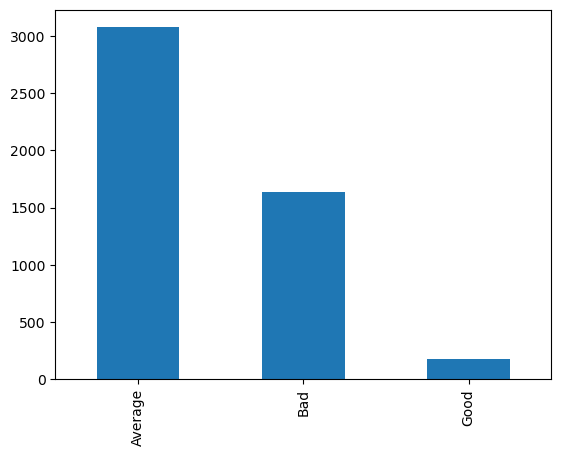

In [13]:
white_wine.quality.astype('string').value_counts().sort_index().plot(kind='bar')

In [14]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def makeOverSamplesSMOTE(X_a,y_a):
     from imblearn.over_sampling import SMOTE
     sm = SMOTE(k_neighbors=3)
     X, y = sm.fit_resample(X_a, y_a)
     return X,y
    

def split_scale_sample_data(data, sca = 'MinMax', oversample = 'False'):

    X = data[data.columns[:-1]].values; y = data[data.columns[-1]].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)

    if sca == 'MinMax':
        scaler = MinMaxScaler()
    elif sca == 'Standard':
        scaler = StandardScaler()
        
    X_train = scaler.fit_transform(X_train)  
    X_test = scaler.transform(X_test)
    
    if oversample == 'True': 
        oversampler = RandomOverSampler()
        X_train, y_train = oversampler.fit_resample(X_train,y_train)
    elif oversample == 'SMOTE':
        X_train, y_train = makeOverSamplesSMOTE(X_train, y_train)
        
           
    return X_train, X_test, y_train, y_test

Since our data is prepared, let us select some highly efficient algorithm to train for multi-class classification. First, let us start with a simple K-NN model:

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def KNN_param_grid(X_train, X_test, y_train, y_test):
    param_grid = {'n_neighbors': [1,2,5,10,25,50,100]}
    print("Parameter grid:\n{}".format(param_grid))
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Test set score:", grid_search.score(X_test, y_test))
    print("Best parameters: {}".format(grid_search.best_params_))


In [16]:
X_train_f, X_test_f, y_train_f, y_test_f = split_scale_sample_data(white_wine,'MinMax','False')
X_train_t, X_test_t, y_train_t, y_test_t = split_scale_sample_data(white_wine,'MinMax','True')
X_train_s, X_test_s, y_train_s, y_test_s = split_scale_sample_data(white_wine,'MinMax','SMOTE')


In [17]:
KNN_param_grid(X_train_f, X_test_f, y_train_f, y_test_f)

Parameter grid:
{'n_neighbors': [1, 2, 5, 10, 25, 50, 100]}
Test set score: 0.7775510204081633
Best parameters: {'n_neighbors': 1}


In [18]:
KNN_param_grid(X_train_t, X_test_t, y_train_t, y_test_t)

Parameter grid:
{'n_neighbors': [1, 2, 5, 10, 25, 50, 100]}
Test set score: 0.7775510204081633
Best parameters: {'n_neighbors': 1}


In [19]:
KNN_param_grid(X_train_s, X_test_s, y_train_s, y_test_s)

Parameter grid:
{'n_neighbors': [1, 2, 5, 10, 25, 50, 100]}
Test set score: 0.7693877551020408
Best parameters: {'n_neighbors': 1}


We see that n_neighbors = 1 is the best choice, which means that we can successfully guess the quality of a wine using the quality score of the wine closest  to it. 

Oversampling does not really help with the validation set score in this method, SMOTE methodology seems to be performing worse than the other two options.


Next, let us see the performance of decision trees and random forests:

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def DecisionTree_param_grid(X_train, X_test, y_train, y_test):
    param_grid = {'max_depth': [2,4,6,8,10], 'min_samples_split':[1,2,5,10], 'criterion' :[ "gini", "entropy", "log_loss"]}    
    print("Parameter grid:\n{}".format(param_grid))
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Valid set score:", grid_search.score(X_test, y_test))
    print("Best parameters: {}".format(grid_search.best_params_))
    
    results = pd.DataFrame(grid_search.cv_results_)
   
def RandomForest_param_grid(X_train, X_test, y_train, y_test):
    param_grid = {'n_estimators': [10,50,100], 'criterion' :[ "gini", "entropy", "log_loss"]}    
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Valid set score:", grid_search.score(X_test, y_test))
    
    results = pd.DataFrame(grid_search.cv_results_)   
    return grid_search.score(X_test, y_test)

In [21]:
DecisionTree_param_grid(X_train_f, X_test_f, y_train_f, y_test_f)

Parameter grid:
{'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [1, 2, 5, 10], 'criterion': ['gini', 'entropy', 'log_loss']}
Valid set score: 0.7489795918367347
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


In [22]:
DecisionTree_param_grid(X_train_t, X_test_t, y_train_t, y_test_t)

Parameter grid:
{'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [1, 2, 5, 10], 'criterion': ['gini', 'entropy', 'log_loss']}
Valid set score: 0.6306122448979592
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


In [23]:
DecisionTree_param_grid(X_train_s, X_test_s, y_train_s, y_test_s)

Parameter grid:
{'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [1, 2, 5, 10], 'criterion': ['gini', 'entropy', 'log_loss']}
Valid set score: 0.6326530612244898
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 1}


In [38]:
RandomForest_param_grid(X_train_f, X_test_f, y_train_f, y_test_f)

Valid set score: 0.7918367346938775


In [39]:
RandomForest_param_grid(X_train_t, X_test_t, y_train_t, y_test_t)

Valid set score: 0.7836734693877551


In [40]:
RandomForest_param_grid(X_train_s, X_test_s, y_train_s, y_test_s)

Valid set score: 0.7775510204081633


We note that up until this point RandomForest with not oversampling has the best validation set score of 0.79. Let us train a MLP neural net:

In [27]:
from sklearn.neural_network import MLPClassifier

def NN_param_grid(X_train, X_test, y_train, y_test):
    param_grid = {'activation': ['relu'], 
                  'hidden_layer_sizes': [(15,25),(15,5),(50,50)],
                  'learning_rate': ['adaptive'], 'solver':['sgd'], 'max_iter': [500]
                  }    
    print("Parameter grid:\n{}".format(param_grid))
    grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Valid set score:", grid_search.score(X_test, y_test))
    print("Best parameters: {}".format(grid_search.best_params_))
    
    results = pd.DataFrame(grid_search.cv_results_)  
    

In [28]:
 #NN_param_grid(X_train_f, X_test_f, y_train_f, y_test_f)
 #it throws lots of warnings so commented out - it works correctly

Lastly, we can train a multiclass logistic regression model:

In [52]:
from sklearn.linear_model import LogisticRegression

def LogisticRegression_grid(X_train, X_test, y_train, y_test):
    param_grid = {'multi_class': ['ovr'], 
                  'penalty' : ['l2', None]
                  }    
    print("Parameter grid:\n{}".format(param_grid))
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Valid set score:", grid_search.score(X_test, y_test))
    print("Best parameters: {}".format(grid_search.best_params_))
    
    results = pd.DataFrame(grid_search.cv_results_)  
    return grid_search.score(X_test, y_test)

In [53]:
LogisticRegression_grid(X_train_f, X_test_f, y_train_f, y_test_f)

Parameter grid:
{'multi_class': ['ovr'], 'penalty': ['l2', None]}
Valid set score: 0.7020408163265306
Best parameters: {'multi_class': 'ovr', 'penalty': None}


0.7020408163265306

More parameter tuning could help neural net, however, the prediction rates are not that close to random forest results, so let us go with the random forests for now.

Let us check all the methods one more time using the best models selected by cross validation.


In [31]:
# I will fit the models again however this step can be skipped if we record the fits on top.
decision_tree_fit = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_split= 2).fit(X_train_f,y_train_f)
random_forest_fit = RandomForestClassifier(criterion= 'entropy', n_estimators= 100).fit(X_train_f,y_train_f)
nn_fit = MLPClassifier(activation= 'relu', hidden_layer_sizes= (50, 50), learning_rate= 'adaptive'
                       , max_iter= 500, solver= 'adam').fit(X_train_f,y_train_f) # lowered the max_iter for speed
knn_fit = KNeighborsClassifier(n_neighbors = 1).fit(X_train_f,y_train_f)

print('decision_tree_test_score',decision_tree_fit.score(X_test_f, y_test_f))
print('random_forest_test_score',random_forest_fit.score(X_test_f, y_test_f))
print('nn_test_score',nn_fit.score(X_test_f, y_test_f))
print('knn_test_score',knn_fit.score(X_test_f, y_test_f))

decision_tree_test_score 0.753061224489796
random_forest_test_score 0.7918367346938775
nn_test_score 0.7
knn_test_score 0.7775510204081633


Let us try to work out which parameters are the most important to prediction power:

Text(0.5, 0, 'Feature Importance Figure')

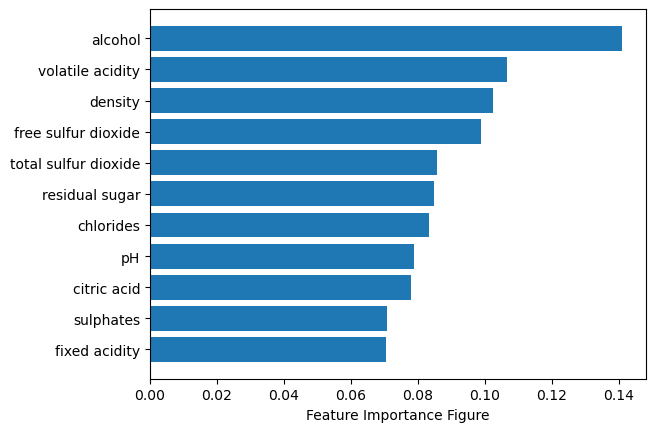

In [32]:
sorted_idx = random_forest_fit.feature_importances_.argsort()
plt.barh(white_wine.columns[:-1][sorted_idx], random_forest_fit.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance Figure")

There are no completely useless features. However, we can see that alcohol amount plays the biggest role in quality of the wine. We can use other methods to understand the contribution of each feature to the model prediction power. For example, we can train random forests model using only a subset of features to see which feature is "fine" to remove. Let us leave one feature out and train our models using the previous cross-validation procedure below:

In [37]:
no_features = len(X_train_f[0])
for index in range(no_features):
    print('Remove the feature '+str(index+1)+':')
    new_range = np.delete(np.arange(no_features), index)
    RandomForest_param_grid(X_train_f[:,new_range], X_test_f[:,new_range], y_train_f, y_test_f)
    

Remove the feature 1:
Valid set score: 0.7959183673469388
Remove the feature 2:
Valid set score: 0.7795918367346939
Remove the feature 3:
Valid set score: 0.789795918367347
Remove the feature 4:
Valid set score: 0.7918367346938775
Remove the feature 5:
Valid set score: 0.8040816326530612
Remove the feature 6:
Valid set score: 0.7959183673469388
Remove the feature 7:
Valid set score: 0.7877551020408163
Remove the feature 8:
Valid set score: 0.7918367346938775
Remove the feature 9:
Valid set score: 0.7938775510204081
Remove the feature 10:
Valid set score: 0.7816326530612245
Remove the feature 11:
Valid set score: 0.8


We note that features 11 and 5 might be removed from the model without loss in predictive power. However, note that, when we remove one feature, seemingly unimportant feature might become more important due to possible collinearities. I will write the following code to remove features step by step and continue with removing process until the validation score gets lower than 0.78, then we stop and extract the important features:

In [59]:
no_features = len(X_train_f[0])

max_validation_score = 100
current_range = np.arange(no_features)
while True: 
    validation_score = [] 
    for index in current_range:
        new_range = np.delete(current_range, np.where(current_range == index), axis=0)
        print('Selected_features:',new_range)
        score = RandomForest_param_grid(X_train_f[:,new_range], X_test_f[:,new_range], y_train_f, y_test_f)
        validation_score.append(score)
        
    ### remove the feature with the least predictive impact on our model
    remove_feature = current_range[np.argmax(validation_score)]  
    
    max_validation_score = max(validation_score)
    if max_validation_score >= 0.79: ## if the prediction score is still high, we continue
        print("Remove feature "+ str(remove_feature))
        current_range = np.delete(current_range, np.where(current_range == remove_feature), axis=0)
    else: break
print('Features remaining after applying forward feature selection:', white_wine.columns[current_range])
    

Selected_features: [ 1  2  3  4  5  6  7  8  9 10]
Valid set score: 0.7857142857142857
Selected_features: [ 0  2  3  4  5  6  7  8  9 10]
Valid set score: 0.7857142857142857
Selected_features: [ 0  1  3  4  5  6  7  8  9 10]
Valid set score: 0.7836734693877551
Selected_features: [ 0  1  2  4  5  6  7  8  9 10]
Valid set score: 0.7918367346938775
Selected_features: [ 0  1  2  3  5  6  7  8  9 10]
Valid set score: 0.7959183673469388
Selected_features: [ 0  1  2  3  4  6  7  8  9 10]
Valid set score: 0.7938775510204081
Selected_features: [ 0  1  2  3  4  5  7  8  9 10]
Valid set score: 0.7938775510204081
Selected_features: [ 0  1  2  3  4  5  6  8  9 10]
Valid set score: 0.7918367346938775
Selected_features: [ 0  1  2  3  4  5  6  7  9 10]
Valid set score: 0.7938775510204081
Selected_features: [ 0  1  2  3  4  5  6  7  8 10]
Valid set score: 0.7775510204081633
Selected_features: [0 1 2 3 4 5 6 7 8 9]
Valid set score: 0.8020408163265306
Remove feature 10
Selected_features: [1 2 3 4 5 6 7 8

To our great surprise, by removing features we can actually achieve a better prediction rate than before. This happens because models can get confused and overfit noise. Also, sometimes two features are highly collinear, resulting in poor performance. At the end of this feature selection procedure, we have a more compact feature list with better predictive power. 

At the end, we have a quite strong model only using the features: 
'volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates'

Note that, compared to our previous feature importance figure we do not include alcohol in our model, this might be result of alcohol feature can be predicted by using the features remaining in our model.

If we have time in our hands, we can apply this procedure by mixing-matching the features to find the most compact model without losing any predictive power. 

In [71]:
selected_features = ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates','quality']
white_wine_new = white_wine[selected_features]

X_train_subset, X_test_subset, y_train_subset, y_test_subset = split_scale_sample_data(white_wine_new,'MinMax','False')
RandomForest_param_grid(X_train_subset, X_test_subset, y_train_subset, y_test_subset) # sanity check results

Valid set score: 0.8


0.8

Next, we can use random forest regression to estimate the quality of wine. In this case, quality can get continuous values.

In [72]:
from sklearn.ensemble import RandomForestRegressor

def RandomForestRegressor_param_grid(X_train, X_test, y_train, y_test):
    param_grid = {    'bootstrap': [True],
    'max_depth': [5, 10, 15],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 500]}    
    print("Parameter grid:\n{}".format(param_grid))
    grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Valid set score: ", grid_search.score(X_test, y_test))
    print("Best parameters: ", grid_search.best_params_)
    predictions = grid_search.best_estimator_.predict(X_test)
    print("MAE: ", np.mean(np.abs(y_test-predictions)))
    results = pd.DataFrame(grid_search.cv_results_)   



In [73]:
X_train_fc, X_test_fc, y_train_fc, y_test_fc = split_scale_sample_data(white_wine_continuous,'MinMax','False')
RandomForestRegressor_param_grid(X_train_fc, X_test_fc, y_train_fc, y_test_fc)

Parameter grid:
{'bootstrap': [True], 'max_depth': [5, 10, 15], 'max_features': [2, 3], 'n_estimators': [100, 200, 500]}
Valid set score:  0.4626223557009077
Best parameters:  {'bootstrap': True, 'max_depth': 15, 'max_features': 3, 'n_estimators': 500}
MAE:  0.46823141291770215


We note that regression works fine considering the Mean Absolute Error. We are in average 0.5 far away from the correct classification. The valid set score is quite low. These experiments point out that aggregating dependent variable of quality in bins of bad, average, good wines almost doubles the prediction power of our models.